<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Deep_Neural_Network_DNN/DNN_CIFAR_10_Categorical_Classification_Overfitting_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import warnings
warnings.filterwarnings('ignore')


In [31]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [32]:
print(type(X_train))
print(len(X_train))
print(X_train.shape)
print()
print(type(y_train))
print(len(y_train))
print(y_train[0:5])


<class 'numpy.ndarray'>
50000
(50000, 32, 32, 3)

<class 'numpy.ndarray'>
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [33]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])


10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


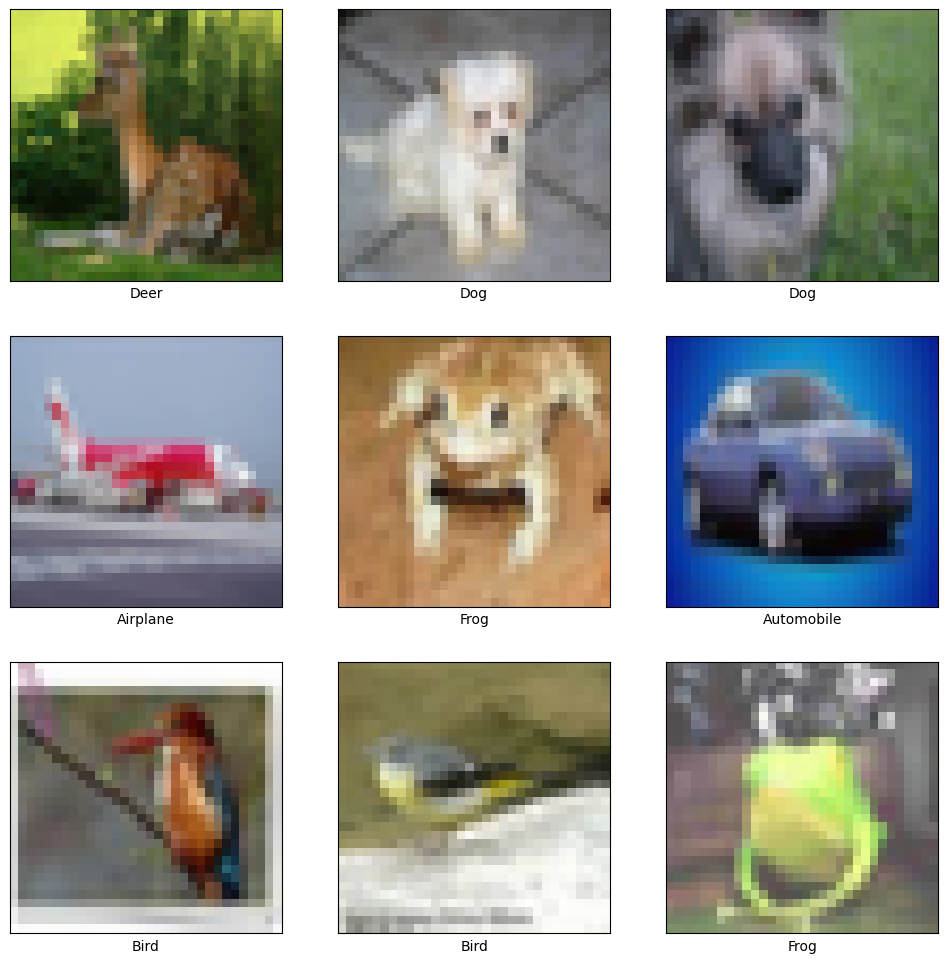

In [34]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
import matplotlib.pyplot as plt
import numpy as np
Indexes = np.random.randint(50000,
                            size = 9)
plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

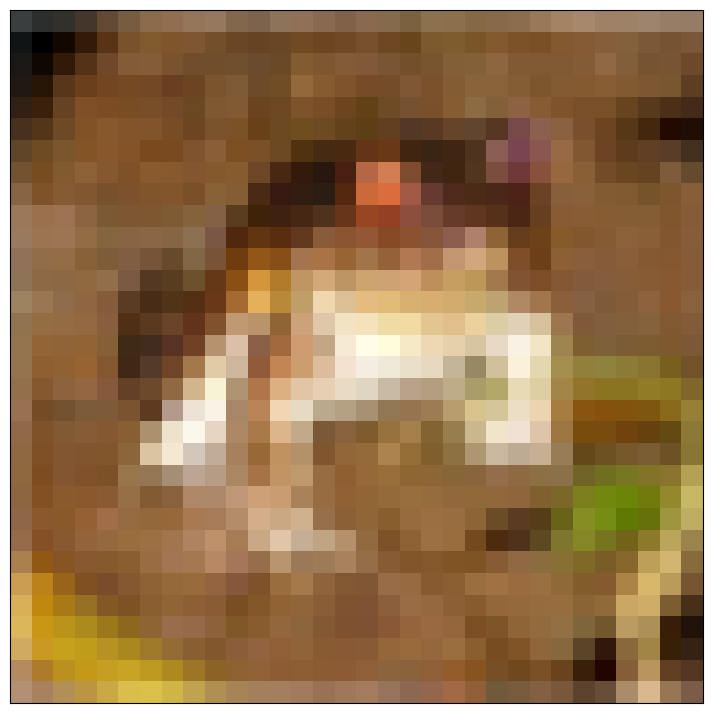

In [35]:
digit = X_train[0]
plt.figure(figsize = (9, 9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()


In [37]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)
print(y_train[0])
print()
print(X_train[0][0][0])
print(X_train[0][0][0][0])
# print(X_train[0][:, :, 0])


[6]

[59 62 63]
59


In [38]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))
X_train.shape, X_test.shape
print(X_train[0])

[ 59  62  63  43  46  45  50  48  43  68  54  42  98  73  52 119  91  63 139 107  75 145 110  80 149 117  89 149 120  93 131 103  77 125  99  76 142
 115  91 144 112  86 137 105  79 129  97  71 137 106  79 134 106  76 124  97  64 139 113  78 139 112  75 133 105  69 136 105  74 139 108  77 152 120
  89 163 131 100 168 136 108 159 129 102 158 130 104 158 132 108 152 125 102 148 124 103  16  20  20   0   0   0  18   8   0  51  27   8  88  51  21
 120  82  43 128  89  45 127  86  44 126  87  50 116  79  44 106  70  37 101  67  35 105  70  36 113  74  35 109  70  33 112  72  37 119  79  44 109
  71  33 105  69  27 125  89  46 127  92  46 122  85  39 131  89  47 124  82  41 121  79  37 131  89  48 132  91  53 133  94  58 133  96  60 123  88
  55 119  83  50 122  87  57  25  24  21  16   7   0  49  27   8  83  50  23 110  72  41 129  92  54 130  93  55 121  82  47 113  77  43 112  78  44
 112  79  46 106  75  45 105  73  38 128  92  48 124  87  47 130  92  56 127  89  56 122  85  51 115  79  

In [9]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [10]:
print(X_train[0])


[0.23137255 0.24313725 0.24705882 0.16862745 0.18039216 0.17647059 0.19607843 0.18823529 0.16862745 0.26666667 0.21176471 0.16470588 0.38431373
 0.28627451 0.20392157 0.46666667 0.35686275 0.24705882 0.54509804 0.41960784 0.29411765 0.56862745 0.43137255 0.31372549 0.58431373 0.45882353
 0.34901961 0.58431373 0.47058824 0.36470588 0.51372549 0.40392157 0.30196078 0.49019608 0.38823529 0.29803922 0.55686275 0.45098039 0.35686275
 0.56470588 0.43921569 0.3372549  0.5372549  0.41176471 0.30980392 0.50588235 0.38039216 0.27843137 0.5372549  0.41568627 0.30980392 0.5254902
 0.41568627 0.29803922 0.48627451 0.38039216 0.25098039 0.54509804 0.44313725 0.30588235 0.54509804 0.43921569 0.29411765 0.52156863 0.41176471
 0.27058824 0.53333333 0.41176471 0.29019608 0.54509804 0.42352941 0.30196078 0.59607843 0.47058824 0.34901961 0.63921569 0.51372549 0.39215686
 0.65882353 0.53333333 0.42352941 0.62352941 0.50588235 0.4        0.61960784 0.50980392 0.40784314 0.61960784 0.51764706 0.42352941 0.59

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
print(y_train[:5])


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)


In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))


In [17]:
CIFAR.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              6293504   
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7409546 (28.27 MB)
Trainable params: 7409546 (28.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [19]:
%%time
Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))


Epoch 1/100
250/250 [==============================] - 8s 8ms/step - loss: 2.0706 - accuracy: 0.2702 - val_loss: 1.8139 - val_accuracy: 0.3476
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 1.7757 - accuracy: 0.3643 - val_loss: 1.7230 - val_accuracy: 0.3832
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 1.6968 - accuracy: 0.3926 - val_loss: 1.6755 - val_accuracy: 0.4035
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 1.6210 - accuracy: 0.4170 - val_loss: 1.6685 - val_accuracy: 0.4072
Epoch 5/100
250/250 [==============================] - 2s 6ms/step - loss: 1.5762 - accuracy: 0.4381 - val_loss: 1.5909 - val_accuracy: 0.4290
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 1.5450 - accuracy: 0.4475 - val_loss: 1.5508 - val_accuracy: 0.4464
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 1.4975 - accuracy: 0.4670 - val_loss: 1.5441 - val_accuracy: 0.4519

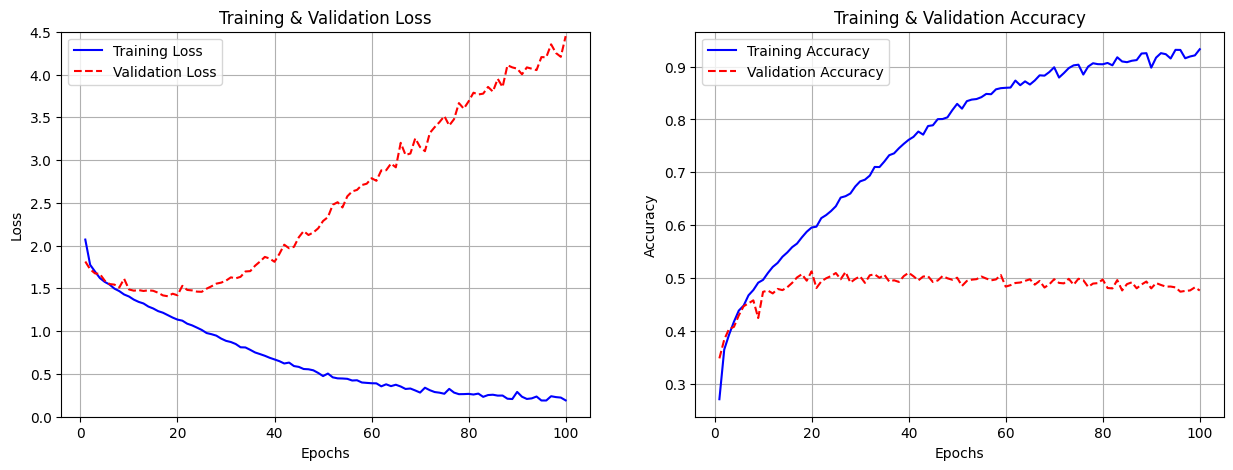

In [20]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 4.5)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [21]:
loss, accuracy = CIFAR.evaluate(X_test, y_test, verbose = 0)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))


Loss = 4.35353
Accuracy = 0.48170


In [22]:
np.set_printoptions(suppress = True, precision = 9)
print(CIFAR.predict(X_test[:1,:], verbose = 0))


[[0.000000205 0.000001365 0.001017347 0.01424732  0.000424555 0.000000006 0.000000229 0.000000026 0.000001336 0.9843076  ]]


In [23]:
print(np.argmax(CIFAR.predict(X_test[:1,:], verbose = 0)))

9


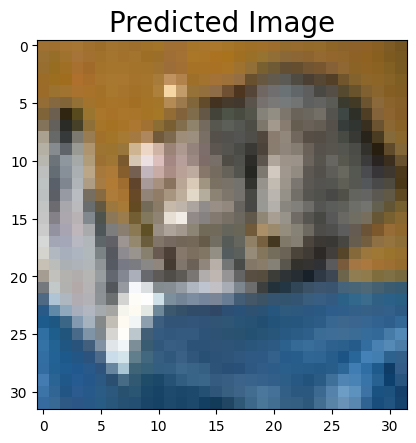

In [24]:
plt.imshow(X_test[0].reshape(32, 32, 3), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()